In [ ]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [ ]:
pip install kaggler

     |████████████████████████████████| 819kB 8.5MB/s 
  Created wheel for kaggler: filename=Kaggler-0.8.13-cp37-cp37m-linux_x86_64.whl size=2137209 sha256=d49515eba4893d27b2584bcbbeb063a92ab8c46c89b2bd1e8aee9c666cbb212d
  Stored in directory: /root/.cache/pip/wheels/ae/9f/ed/b41a4cb406be1bd951ec2898582aedebd3e2da341b06e61d8a
  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-cp37-none-any.whl size=7850 sha256=53545ac6d780f44155bc0775a16c38bb88d36a6feacf5420d196666ae916940d
  Stored in directory: /root/.cache/pip/wheels/b3/61/2d/776be7b8a4f14c5db48c8e5451451cabc58dc6aa7ee3801163
Successfully built kaggler ml-metrics


In [ ]:
from kaggler.preprocessing import LabelEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2-2 Feature Engineering

 -DAYS_EMPLOYED 양수 ->no_job으로 분류

 -결측값 -> income_type과의 상관관계로 채우기

 -DAYS_BIRTH, begin_month,DAYS_EMPLOYED  양수변환

 -범주형 변수 -> Label Encoding

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/DACON_신용카드연체여부예측/open/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DACON_신용카드연체여부예측/open/test.csv')

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

# 1. 결측값 대체 (occyp_type)

## 1-1 DAYS_EMPLOYED 

DAYS_EMPLOYED 가 양수 -> 무직

In [ ]:
train[(train['DAYS_EMPLOYED']>0) & (train['occyp_type'].isnull())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,NaN,2.0,-7.0,2.0
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,1,0,1,0,NaN,1.0,-5.0,2.0
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,1,0,1,0,NaN,1.0,-24.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21151,365243,1,0,0,1,NaN,1.0,-60.0,1.0
26432,26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22314,365243,1,0,1,0,NaN,2.0,-17.0,1.0
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2.0,-57.0,2.0
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-43.0,2.0


In [ ]:
#train
train.loc[(train['DAYS_EMPLOYED']>0) & (train['occyp_type'].isnull()),'occyp_type']='no_job'
#test
test.loc[(test['DAYS_EMPLOYED']>0) & (test['occyp_type'].isnull()),'occyp_type']='no_job'

In [ ]:
train[train['occyp_type']=='no_job']

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,no_job,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,no_job,2.0,-37.0,2.0
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,no_job,2.0,-7.0,2.0
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,1,0,1,0,no_job,1.0,-5.0,2.0
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,1,0,1,0,no_job,1.0,-24.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21151,365243,1,0,0,1,no_job,1.0,-60.0,1.0
26432,26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22314,365243,1,0,1,0,no_job,2.0,-17.0,1.0
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,no_job,2.0,-57.0,2.0
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,no_job,1.0,-43.0,2.0


-occyp와 다른 변수간의 관계 살펴보기

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

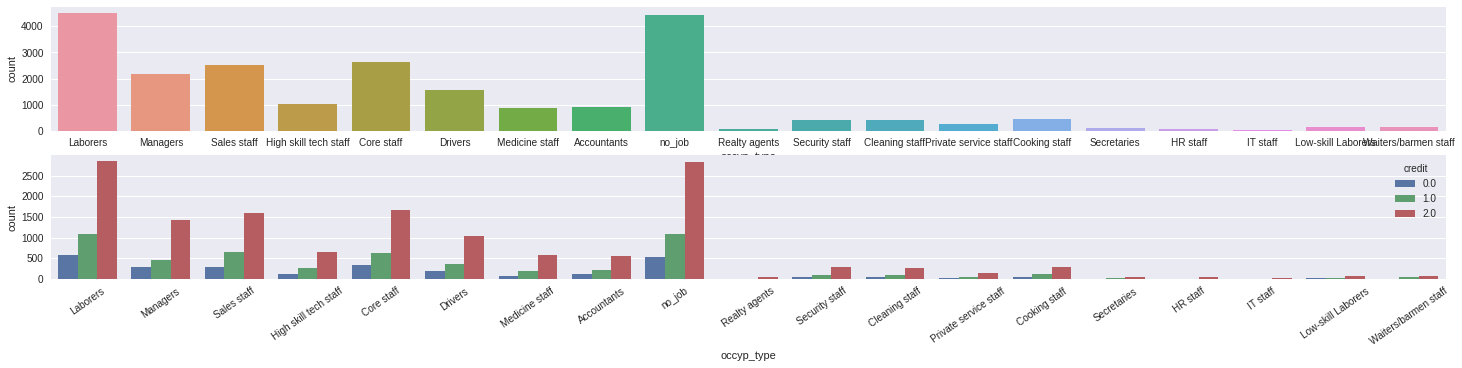

In [ ]:
#occyp 분포
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(25,5))

sns.countplot(data=train, x='occyp_type',ax=axes[0])
plt.xticks(rotation = 35 )

sns.countplot(data=train, x='occyp_type',hue='credit',ax=axes[1])
plt.xticks(rotation =35 )

## 1-2 income_type과의 관계

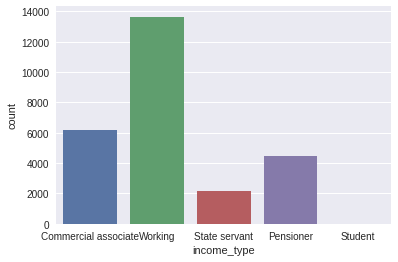

In [ ]:
#income_type 분포
sns.countplot(data=train, x='income_type')

대부분 working에 해당,  student 거의 없음

In [ ]:
# income_type 과의 관계
income_df = train.pivot_table(values='index',index='occyp_type',columns='income_type',aggfunc='count')
income_df = income_df.fillna(0)
income_df

income_type,Commercial associate,Pensioner,State servant,Student,Working
occyp_type,,,,,
Accountants,363.0,1.0,69.0,0.0,469.0
Cleaning staff,80.0,0.0,16.0,0.0,307.0
Cooking staff,92.0,0.0,41.0,0.0,324.0
Core staff,609.0,2.0,655.0,4.0,1376.0
Drivers,418.0,1.0,87.0,0.0,1069.0
HR staff,21.0,0.0,3.0,0.0,38.0
High skill tech staff,306.0,0.0,148.0,0.0,586.0
IT staff,15.0,0.0,6.0,0.0,20.0
Laborers,1075.0,3.0,142.0,2.0,3290.0


In [ ]:
# occyp_type별 income_type이 차지하는 비중
income_df = train.pivot_table(values='index',index='income_type',columns='occyp_type',aggfunc='count')
income_df = income_df.fillna(0)
income_df = income_df.apply(lambda x: x/x.sum()).T

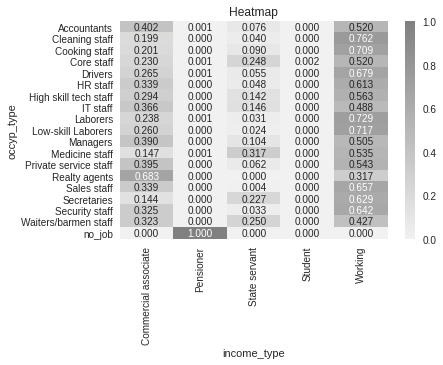

In [ ]:
sns.heatmap(income_df, cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt=".3f")
plt.title("Heatmap")
plt.show()

no_job은 100% Pensioner

Realty agents 외 모든 occyp_type 에서 working의 비율이 가장 높음 

In [ ]:
# income_type별 occyp_type이 차지하는 비중
income_df = train.pivot_table(values='index',index='occyp_type',columns='income_type',aggfunc='count')
income_df = income_df.fillna(0)
income_df=income_df.apply(lambda x: x/x.sum())

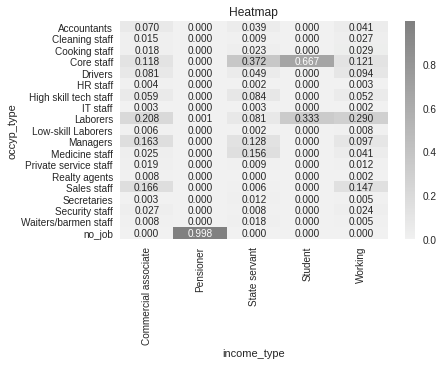

In [ ]:
sns.heatmap(income_df, cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt=".3f")
plt.title("Heatmap")
plt.show()

Pensioner -> 대부분 no_job

Commercial associate ,Working -> Laborers 의 비율 가장 높음

State servant, Students -> Core staff  비율 가장 높음 / 하지만 student, state servant의 비율 매우 낮음


## 결측값인 데이터들의 income_type 분포 확인

In [ ]:
na_df = train[train['occyp_type'].isnull()]
na_df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,NaN,2.0,-7.0,2.0
20,20,M,N,N,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-19850,-1753,1,0,1,0,NaN,2.0,-35.0,2.0
23,23,M,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-14542,-444,1,1,1,1,NaN,2.0,-18.0,2.0


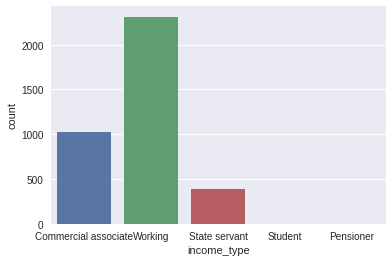

In [ ]:
sns.countplot(data=na_df, x='income_type')

## 1-3 income_total과의 관계

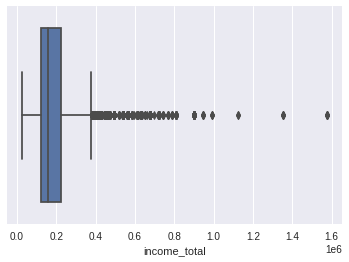

In [ ]:
#income 분포
sns.boxplot(data=train,x='income_total')

income total 높은 쪽의 이상치 많음

In [ ]:
median_df =train.pivot_table(values='income_total', index='occyp_type',aggfunc='median')
mean_df =train.pivot_table(values='income_total', index='occyp_type',aggfunc='median')

median_df.reset_index(inplace=True)
mean_df.reset_index(inplace=True)

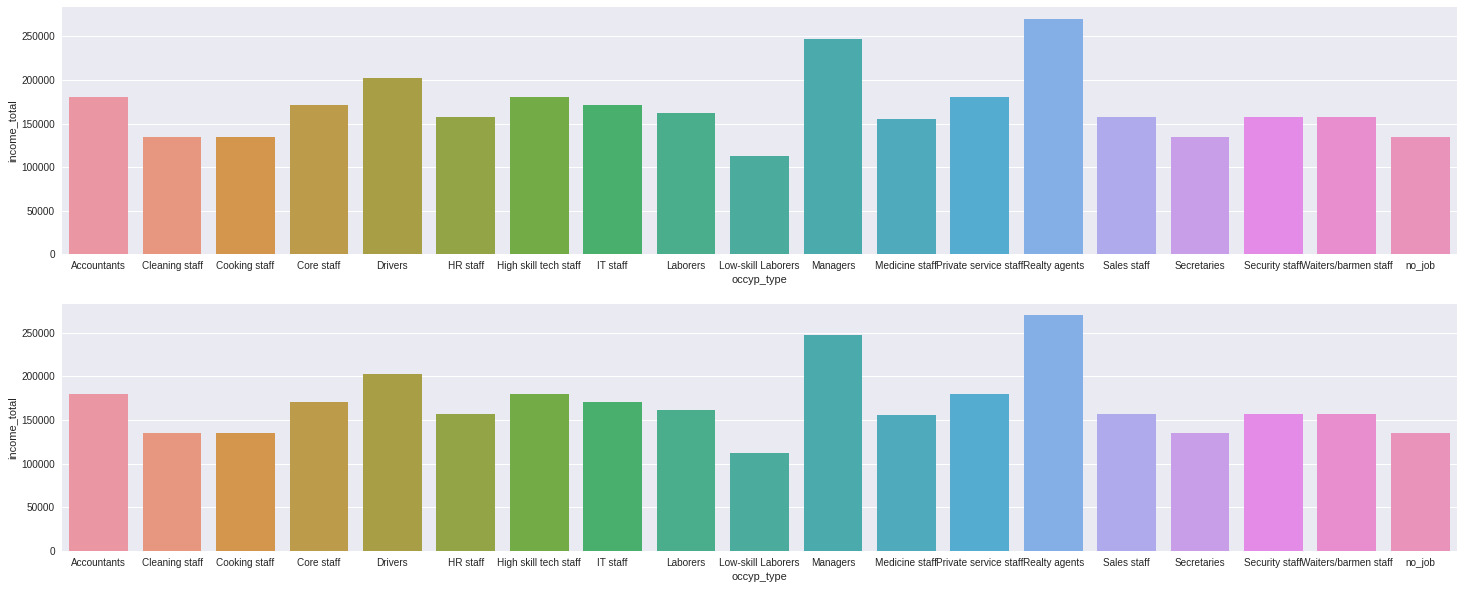

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(25,10))
sns.barplot(x='occyp_type',y='income_total',data=median_df,ax=axes[0])
sns.barplot(x='occyp_type',y='income_total',data=mean_df,ax=axes[1])

In [ ]:
mean_df.sort_values(by='income_total',ascending=False)

,occyp_type,income_total
13,Realty agents,270000.0
10,Managers,247500.0
4,Drivers,202500.0
0,Accountants,180000.0
6,High skill tech staff,180000.0
12,Private service staff,180000.0
3,Core staff,171000.0
7,IT staff,171000.0
8,Laborers,162000.0
17,Waiters/barmen staff,157500.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

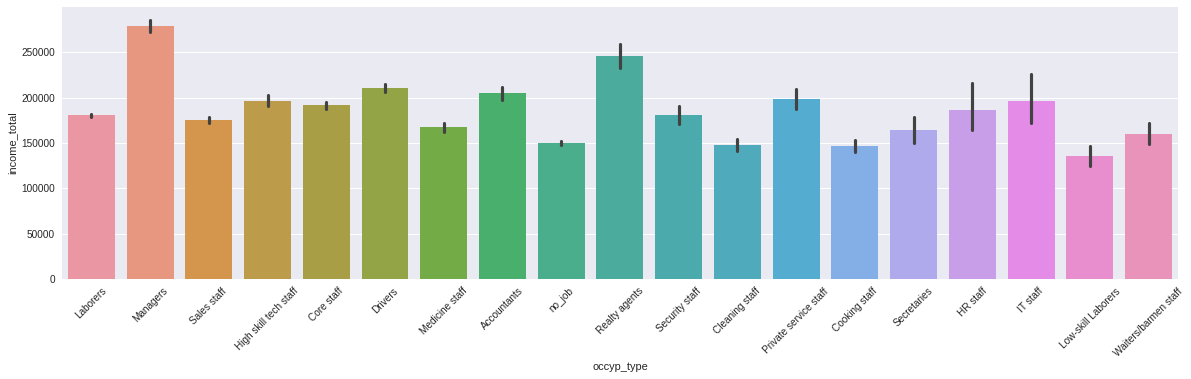

In [ ]:
plt.figure(figsize = (20, 5))
sns.barplot(data=train,x='occyp_type',y='income_total')
plt.xticks(rotation =45 )

Labores, no_job 의 경우 -> 편차 작음

IT Staff, Realty agents ,HR staff 편차 큼

### 결측값인 데이터들의 income_total 확인

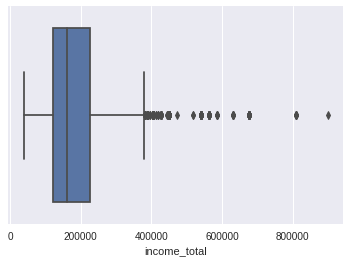

In [ ]:
#income 분포
sns.boxplot(data=na_df,x='income_total')

In [ ]:
na_df.pivot_table(values='index',index='income_type',aggfunc='count')

,index
income_type,
Commercial associate,1026
Pensioner,2
State servant,392
Student,1
Working,2312


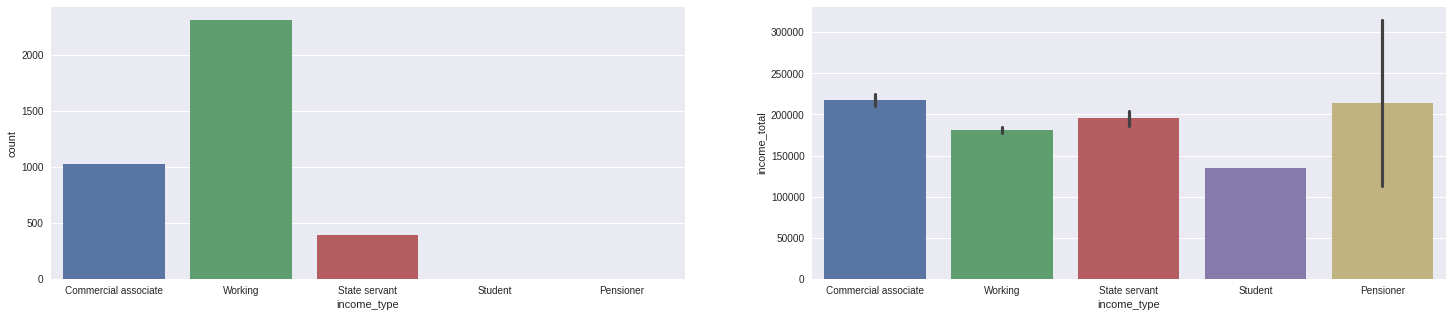

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(25,5))

sns.countplot(data=na_df, x='income_type',ax=axes[0])
sns.barplot(data=na_df,x='income_type',y='income_total',ax=axes[1])


## 1-4 결측값 대체 

In [ ]:
#encoder = OneHotEncoder()
#target_col = ['income_type']
#encoder.fit(train.loc[:,target_col])
#display(pd.DataFrame(encoder.transform(train[target_col]).toarray(), 
#             columns=encoder.get_feature_names(target_col)))

In [ ]:
#income_onehot = pd.DataFrame(encoder.transform(train[target_col]).toarray(), 
#             columns=encoder.get_feature_names(target_col))

In [ ]:
#train = pd.concat([train, income_onehot],axis=1)

In [ ]:
#유클리디안 거리 시간 너무 많이 걸림
#for i in range(len(na_df)):
#  min_value = np.inf
#  idx = 0
#  col_list = [5,-5,-4,-3,-2,-1]
#  for j in range(len(nona_df)):
#      e_distance =(sum((na_df.iloc[i,col_list]-nona_df.iloc[j,col_list])**2))**0.5
#      if e_distance<min_value:
#        min_value = e_distance
#        idx = j#

 # na_df['occyp_type'][i] = nona_df['occyp_type'][idx]


In [ ]:
#train
for i in range(len(train)):
  if type(train['occyp_type'][i])==float:
    if (train['income_type'][i]=='Commercial associate')|(train['income_type'][i]=='Pensioner')|(train['income_type'][i]=='Working'):
      train['occyp_type'][i] ='Laborers'
    elif (train['income_type'][i]=='Pensioner'):
      train['occyp_type'][i] ='no_job'
    elif (train['income_type'][i]=='State servant')|(train['income_type'][i]=='Student'):
      train['occyp_type'][i] ='Core staff'
  else:
    pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
#test set
for i in range(len(test)):
  if type(test['occyp_type'][i])==float:
    if (test['income_type'][i]=='Commercial associate')|(test['income_type'][i]=='Pensioner')|(test['income_type'][i]=='Working'):
      test['occyp_type'][i] ='Laborers'
    elif (test['income_type'][i]=='Pensioner'):
      test['occyp_type'][i] ='no_job'
    elif (test['income_type'][i]=='State servant')|(test['income_type'][i]=='Student'):
      test['occyp_type'][i] ='Core staff'
  else:
    pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
train.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

In [ ]:
test.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
dtype: int64

# 2. DAYS_EMPLOYED, DAYS_BIRTH, begin_month -> 양수로 변환

In [ ]:
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].apply(lambda x: x*-1)
train['DAYS_BIRTH'] = train['DAYS_BIRTH'].apply(lambda x: x*-1)
train['begin_month'] = train['begin_month'].apply(lambda x: x*-1)

In [ ]:
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].apply(lambda x: x*-1)
test['DAYS_BIRTH'] = test['DAYS_BIRTH'].apply(lambda x: x*-1)
test['begin_month'] = test['begin_month'].apply(lambda x: x*-1)

# 3. Age 열 *만들기*

In [ ]:
train['age'] = train['DAYS_BIRTH'].apply(lambda x: round(x/365) )
test['age'] = test['DAYS_BIRTH'].apply(lambda x: round(x/365) )

In [ ]:
del train['DAYS_BIRTH']
del test['DAYS_BIRTH']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     26457 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

# 4. Label Encoding

In [ ]:
train[['gender','car','reality','income_type','edu_type','family_type','house_type','FLAG_MOBIL','work_phone','email','phone','email','occyp_type']] = \
train[['gender','car','reality','income_type','edu_type','family_type','house_type','FLAG_MOBIL','work_phone','email','phone','email','occyp_type']].apply(lambda x: x.astype('object'))

test[['gender','car','reality','income_type','edu_type','family_type','house_type','FLAG_MOBIL','work_phone','email','phone','email','occyp_type']] = \
test[['gender','car','reality','income_type','edu_type','family_type','house_type','FLAG_MOBIL','work_phone','email','phone','email','occyp_type']].apply(lambda x: x.astype('object'))


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  object 
 12  work_phone     26457 non-null  object 
 13  phone          26457 non-null  object 
 14  email          26457 non-null  object 
 15  occyp_type     26457 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_EMPLOYED  10000 non-null  int64  
 11  FLAG_MOBIL     10000 non-null  object 
 12  work_phone     10000 non-null  object 
 13  phone          10000 non-null  object 
 14  email          10000 non-null  object 
 15  occyp_type     10000 non-null  object 
 16  family_size    10000 non-null  float64
 17  begin_month    10000 non-null  float64
 18  age    

train set Label encoding

In [ ]:
cat_cols = [x for x in train.columns if train[x].dtype == 'object']
print(len(cat_cols))

12


In [ ]:
lbe = LabelEncoder(min_obs=10)

In [ ]:
train[cat_cols] = lbe.fit_transform(train[cat_cols])
train[cat_cols].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,gender,car,reality,income_type,edu_type,family_type,house_type,FLAG_MOBIL,work_phone,phone,email,occyp_type
0,0,0,1,2.0,1,0,2,0,0,0,0,0
1,0,0,0,2.0,0,2,0,0,0,0,1,0
2,1,1,0,1.0,1,0,0,0,0,1,0,4
3,0,0,0,2.0,0,0,0,0,0,1,0,3
4,0,1,0,4.0,1,0,0,0,0,0,0,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  int64  
 2   car            26457 non-null  int64  
 3   reality        26457 non-null  int64  
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  float64
 7   edu_type       26457 non-null  int64  
 8   family_type    26457 non-null  int64  
 9   house_type     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     26457 non-null  int64  
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [ ]:
train.nunique()

index            26457
gender               2
car                  2
reality              2
child_num            9
income_total       249
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_EMPLOYED     3470
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
occyp_type          19
family_size         10
begin_month         61
credit               3
age                 49
dtype: int64

Test set Label Encoding

In [ ]:
cat_cols = [x for x in test.columns if test[x].dtype == 'object']
print(len(cat_cols))

12


In [ ]:
test[cat_cols] = lbe.fit_transform(test[cat_cols])
test[cat_cols].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,gender,car,reality,income_type,edu_type,family_type,house_type,FLAG_MOBIL,work_phone,phone,email,occyp_type
0,1,1,1,3.0,1.0,2,0,0,0,1,0,1
1,0,0,0,4.0,2.0,0,0,0,0,1,0,2
2,0,0,0,1.0,1.0,0,0,0,1,1,0,0
3,1,1,1,2.0,1.0,0,0,0,1,0,0,5
4,0,1,0,4.0,2.0,0,0,0,1,0,0,4


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  int64  
 2   car            10000 non-null  int64  
 3   reality        10000 non-null  int64  
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  float64
 7   edu_type       10000 non-null  float64
 8   family_type    10000 non-null  int64  
 9   house_type     10000 non-null  int64  
 10  DAYS_EMPLOYED  10000 non-null  int64  
 11  FLAG_MOBIL     10000 non-null  int64  
 12  work_phone     10000 non-null  int64  
 13  phone          10000 non-null  int64  
 14  email          10000 non-null  int64  
 15  occyp_type     10000 non-null  int64  
 16  family_size    10000 non-null  float64
 17  begin_month    10000 non-null  float64
 18  age    

In [ ]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'begin_month', 'credit', 'age'],
      dtype='object')

In [ ]:
test.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'begin_month', 'age'],
      dtype='object')

In [ ]:
del train['index']
del test['index']

train set

In [ ]:
print(train.shape,test.shape)

(26457, 19) (10000, 18)


In [ ]:
train.to_csv('/content/drive/MyDrive/DACON_신용카드연체여부예측/3.류경희/data/train_after_fillna_2.csv',index=False)
test.to_csv('/content/drive/MyDrive/DACON_신용카드연체여부예측/3.류경희/data/test_after_fillna_2.csv',index=False)